In [ ]:
#As demonstrated in ML from Scratch by Patrick Loeber https://www.youtube.com/watch?v=9IDXYHhAfGA

In [18]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [26]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
    
    def fit(self, X, y):
        n_features = X.shape[1] 
        class_labels = np.unique(y)

        #S_W, S_B
        mean_overall = np.mean(X, axis=0)
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))

        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            S_W += (X_c - mean_c).T.dot(X_c - mean_c) 

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)

            S_B += n_c * (mean_diff).dot(mean_diff.T)
        
        A = np.linalg.inv(S_W).dot(S_B)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors[idxs]

        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        
        #project data
        return np.dot(X, self.linear_discriminants.T)


In [28]:
data = datasets.load_iris()

X = data.data
y = data.target

In [30]:
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


C:\Users\tsfra\AppData\Local\Temp\ipykernel_26020\4125240349.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis', 3))


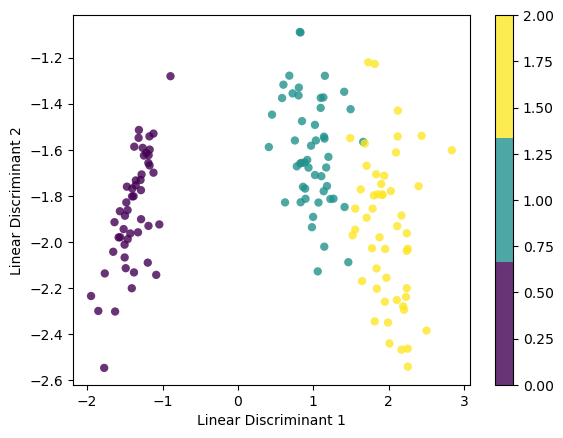

In [32]:
from matplotlib import pyplot as plt
x1 = X_projected[:, 0]

x2 = X_projected[:, 1]

plt.scatter(x1, x2,
            c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()